In [386]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering 

In [387]:
data = pd.read_csv('dataset/iris.csv')

In [388]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [389]:
data.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [390]:
data.drop(['Id', 'Species'],axis=1, inplace = True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [391]:
import random
output = []
for i in range(10):
    r = random.randint(1, 5)
    list1 = []
    for j in range(r):
        list1.append(random.randint(0, 3))
    #print(list1)
    list2 = []
    [list2.append(x) for x in list1 if x not in list2]
    # print(str(list2))
    random_col = data.iloc[:, list2].values
    # print(random_col)

    kmeans = KMeans(n_clusters = 3, random_state =0).fit(random_col)
    partitionings = (kmeans.labels_)
#     print(partitionings)
    output.append(partitionings)
#     print(output)

output_matrix = np.array(output, dtype = int)
print(output_matrix)

# np.savetxt('output_1.txt', output_matrix, fmt = '%i')
    

[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [2 2 2 ... 1 0 0]
 ...
 [2 2 2 ... 1 1 0]
 [1 1 1 ... 2 2 0]
 [1 1 1 ... 2 2 0]]


In [392]:
from sklearn.metrics import adjusted_rand_score
rand_matrix = []
for i in range(10):
    f = []
    for j in range(10):
        rand_score = adjusted_rand_score(output_matrix[i] ,output_matrix[j])
        f.append(rand_score)
    rand_matrix.append(f)
                    
arr_rand = np.array(rand_matrix)
arr_rand = np.sum(arr_rand , axis = 0)
print(arr_rand)

max_rand = np.argmax(arr_rand)
print("the referance label is : " , max_rand)

[7.04499994 7.04499994 4.65819583 7.02995489 3.55123072 7.04499994
 3.55123072 6.47382452 7.20507588 7.0803062 ]
the referance label is :  8


In [393]:
output_matrix

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [2, 2, 2, ..., 1, 0, 0],
       ...,
       [2, 2, 2, ..., 1, 1, 0],
       [1, 1, 1, ..., 2, 2, 0],
       [1, 1, 1, ..., 2, 2, 0]])

In [394]:
ref_solution = output_matrix[max_rand]
ref_solution

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [395]:
def most_frequent(List):
    counter = 0
    num = List[0]

    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num

In [396]:
relabeled_list = []

for solution in output_matrix:
    zeros = [index for index, values in np.ndenumerate(solution) if values == 0]
    ones = [index for index, values in np.ndenumerate(solution) if values == 1]
    twos = [index for index, values in np.ndenumerate(solution) if values == 2]

    r_zeros = [values for index, values in np.ndenumerate(ref_solution) if index in zeros]
    r_ones = [values for index, values in np.ndenumerate(ref_solution) if index in ones]
    r_twos = [values for index, values in np.ndenumerate(ref_solution) if index in twos]

    zero_label = most_frequent(r_zeros)
    one_label = most_frequent(r_ones)
    two_label = most_frequent(r_twos)

    new_solution = solution.copy()
    new_solution[solution == zero_label] = 0
    new_solution[solution == one_label] = 1
    new_solution[solution == two_label] = 2

    relabeled_list.append(new_solution)

In [397]:
relabeled_matrix = np.array(relabeled_list)
relabeled_matrix

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 0, 0],
       ...,
       [1, 1, 1, ..., 2, 2, 0],
       [1, 1, 1, ..., 2, 2, 0],
       [1, 1, 1, ..., 2, 2, 0]])

In [398]:
np.savetxt('relabeled_clusters.txt', relabeled_matrix, fmt = '%i')

In [399]:
voting_list = []
for i in range(len(relabeled_matrix[0])):
    max_count= np.bincount(relabeled_matrix[:, i]).argmax()
    voting_list.append(max_count)  

In [400]:
voting_array = np.array(voting_list, dtype = int)
voting_array

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [401]:
threshold_voting_list = []
for i in range(len(relabeled_matrix[0])):
    max_count= np.bincount(relabeled_matrix[:, i])
    if max_count.max() >= 8:
        threshold_voting_list.append(max_count.argmax()) 
    else:
        threshold_voting_list.append(-1)

In [402]:
np.array(threshold_voting_list)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1, -1,  2,  0,  0,  0,  0,  0, -1, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2, -1,
        2,  2,  2,  2,  0,  2,  2,  2,  2, -1,  2,  0, -1,  2,  2,  2,  2,
        0,  2,  0,  2,  0,  2,  2,  0,  0, -1,  2,  2,  2, -1, -1, -1,  2,
       -1,  2,  0,  2,  2,  2, -1,  2,  2,  2,  0,  2, -1, -1],
      dtype=int64)

In [403]:
data_array = np.array(data)

In [404]:
X_train = [att for att,label in zip(data_array, threshold_voting_list) if label >= 0]
X_test = [att for att,label in zip(data_array, threshold_voting_list) if label == -1]

In [405]:
y_train = [label for label in threshold_voting_list if label >= 0]

In [406]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)

In [407]:
model = SVC()

In [408]:
model.fit(X_train, y_train)

SVC()

In [409]:
classified_label = model.predict(X_test)

In [410]:
for i in range(len(threshold_voting_list)):
    count = 0
    if threshold_voting_list[i] == -1:
        threshold_voting_list[i] = classified_label[count]
        count += 1        

In [411]:
np.array(threshold_voting_list)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0], dtype=int64)

In [412]:
# silhouette_avg = silhouette_score(data, threshold_voting_list)
# print("The silhouette score of the Iris dataset is:", silhouette_avg)

In [413]:
# silhouette_avg = silhouette_score(data, voting_list)
# print("The silhouette score of the Iris dataset is:", silhouette_avg)

In [414]:
spectral_model_rbf = SpectralClustering(n_clusters = 3, affinity ='rbf') 
spectral_cluster_label = spectral_model_rbf.fit_predict(data)
spectral_cluster_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [415]:
# spectral_model_nn = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors') 
# labels_nn = spectral_model_nn.fit_predict(data)
# labels_nn

In [416]:
majority_voting_SS= (silhouette_score(data, voting_array)) 
threshold_voting_SS= (silhouette_score(data, threshold_voting_list))
spectral_cluster_SS= (silhouette_score(data, spectral_cluster_label)) 
print(f'Silhouette Score of majority voting cluser: {majority_voting_SS}')
print(f'Silhouette Score of threshold voting cluser: {threshold_voting_SS}')
print(f'Silhouette Scoreof Spectral Cluster: {spectral_cluster_SS}')

Silhouette Score of majority voting cluser: 0.5509643746707443
Silhouette Score of threshold voting cluser: 0.5275012408363702
Silhouette Scoreof Spectral Cluster: 0.5550802152744265


In [417]:
import numpy as np
import pandas as pd
from tqdm import trange
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import defaultdict
from scipy.sparse import csr_matrix
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

def clustering_ensemble(clusters_list, weights = None, threshold = 0.5, size_max = 18000, cls_num_min = 3):
    """
    Parameters: 
                clusters_list:  List of numpy arrays, representing the cluster_id of each data point
                weights:        List representing the voting weight, for example = [0.5, 0.5]. default None (uses uniform weights)
                threshold:      float(0.0, 1.0), the threshold for determining an edge in the sparse matrix, default 0.5
                size_max:       The maximum size of a cluster, default 18000
                cls_num_min:    The minimum number of clusters, default 7
    Returns: 
                clusters_final: An ensemble of the clustering algorithms predictions.
    weights: Where the ensemble results are the same as before the ensemble, when it does not work, tweaking here may work.
    threshold: The larger the larger, the faster; If you don't have enough memory, try making it bigger.
    """
    # zip same cluster.
    cls_tup_list = []
    for cls_tup in zip(*clusters_list):
        cls_tup_list.append(cls_tup)
    zipper = {x: i for i, x in enumerate(sorted(set(cls_tup_list)))}
    zipped_list = [zipper[x] for x in cls_tup_list]
    unzipper = defaultdict(set)
    for idx, cls_tup in enumerate(cls_tup_list):
        zipped = zipper[cls_tup]
        unzipper[zipped].add(idx)
    comp_clusters_list = [[-1]*len(zipper) for _ in range(len(clusters_list))]
    node_end = len(comp_clusters_list[0])
    print(node_end)
    for clusters, comp_clusters in zip(clusters_list, comp_clusters_list):
        for i, cluster_i in enumerate(clusters):
                value = zipped_list[i]
                comp_clusters[value] = cluster_i             
    # calc adjacency matrix(sparse). and calc score(weighted average)
    # memory error. OMG. I created my own simple. I believe that the reduction in space computation by creating the system by oneself is more advantageous than the constant-doubling speed-up by numpy.
    def create_sparse_matrix(clusters):
        sparse = defaultdict(lambda :defaultdict(int))  # High speed by utilizing cache memory. sparse[(node1, node2)] is slow.
        # if clusters[node1] == clusters[node2] then sparse[node1][node2] = 1
        cluster_idx_of = defaultdict(set)  # cls_inx_of[clster] = set(idx)
        for idx, cluster in enumerate(clusters):
            cluster_idx_of[cluster].add(idx)
        for cluster, idx_list in cluster_idx_of.items():
            for node1 in idx_list:
                for node2 in idx_list:
                    sparse[node1][node2] = 1
        return sparse
    sparse_matrix_list = [create_sparse_matrix(comp_clusters) for comp_clusters in tqdm(comp_clusters_list)]
    if weights is None: weights = [1 / len(sparse_matrix_list) for i in range(len(sparse_matrix_list))]
    weights = np.asarray(weights) / np.sum(weights)
    # Define edge_list (val, node1, node2).
    # However, if you do it normally, there is not enough memory because sparse_matrix_mean is not sparse. By processing every node1, the amount of space calculation is greatly reduced.
    edge_list = []  # [(val, node1, node2), ...]
    for node1 in trange(node_end):
        sparse_matrix_mean = defaultdict(int)
        for sparce_matrix, weight in zip(sparse_matrix_list, weights):
            col = sparce_matrix[node1]
            for node2, val in col.items():
                sparse_matrix_mean[node2] += val*weight
            for node2, val in sparse_matrix_mean.items():
                if val < threshold or node1 >= node2:
                    continue
                edge_list.append((val, node1, node2))
    edge_list.sort(reverse=True)
    class DSU:
        def __init__(self, node_end, unzipper):
            self.par = [i for i in range(node_end)]
            self.siz = [len(unzipper[i]) for i in range(node_end)]
            self.cls_num = node_end  # To use the cls_num variable, we declared this class
        def find(self, x):
            if self.par[x] == x: return x
            self.par[x] = self.find(self.par[x])
            return self.par[x]
        def union(self, x, y):
            x = self.find(x)
            y = self.find(y)
            if x == y:
                return
            if self.siz[x] > self.siz[y]: x, y = y, x
            self.par[x] = y
            self.siz[y] += self.siz[x]
            self.cls_num -= 1
        def get_siz(self, x):
            x = self.find(x)
            return self.siz[x]
    dsu = DSU(node_end, unzipper)
    for w, fr, to in edge_list:
        if (dsu.get_siz(fr)+dsu.get_siz(to)) > size_max: continue
        dsu.union(fr, to)
        if dsu.cls_num <= cls_num_min:
            print("number of clusters reaches cls_num_min: {}".format(cls_num_min), " break.")
            break
    # Unzip the zipped array.
    clusters_final = [0]*len(clusters_list[0])    
    for node in range(node_end):
        cluster_id = dsu.find(node)
        idx_list = unzipper[node]
        for idx in idx_list:
            clusters_final[idx] = cluster_id
    # Renumbered for easier viewing.
    zipper = {x: i for i, x in enumerate(sorted(set(clusters_final)))}
    clusters_final = [zipper[x] for x in clusters_final]   
    return clusters_final

In [418]:
clusters_list = output_matrix
ensemble_preds = clustering_ensemble(clusters_list, weights = None, threshold=0.7)
np.array(ensemble_preds)

29


100%|██████████| 29/29 [00:00<00:00, 9614.64it/s]

number of clusters reaches cls_num_min: 3  break.


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [419]:
silhouette_score(data, ensemble_preds)

0.5305496997959855

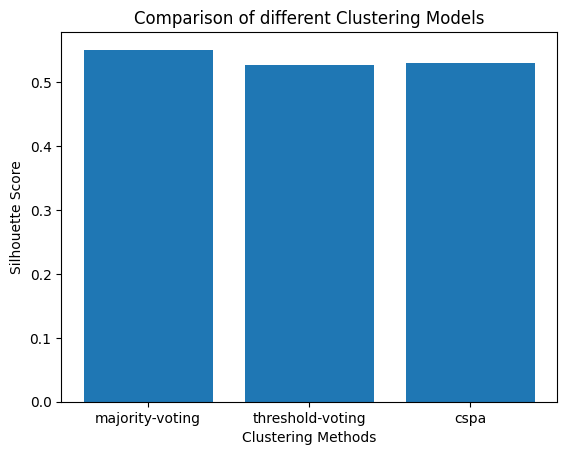

Silhouette Scores: [0.5509643746707443, 0.5275012408363702, 0.5305496997959855]


In [420]:
voting = ['majority-voting', 'threshold-voting', 'cspa'] 
  
# List of Silhouette Scores 
s_scores = [] 
  
# Evaluating the performance 
s_scores.append(silhouette_score(data, voting_array)) 
s_scores.append(silhouette_score(data, threshold_voting_list))
s_scores.append(silhouette_score(data, ensemble_preds)) 
# s_scores.append(silhouette_score(data, labels_nn))  
  
# Plotting a Bar Graph to compare the models 
plt.bar(voting, s_scores) 
plt.xlabel('Clustering Methods') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 

print(f'Silhouette Scores: {s_scores}')